In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('abc').getOrCreate()

In [2]:
df = spark.read.json('assignment_data.jsonl')
# it is not the full dataset 
df.show(10, False)

+-------+-----+--------------------------------+------------------------------------+-------------------+
|country|event|player_id                       |session_id                          |ts                 |
+-------+-----+--------------------------------+------------------------------------+-------------------+
|PK     |start|d6313e1fb7d247a6a034e2aadc30ab3f|674606b1-2270-4285-928f-eef4a6b90a60|2016-11-22T20:40:50|
|null   |end  |20ac16ebb30a477087c3c7501b1fce73|16ca9d01-d240-4527-9f8f-00ef6cddb1d4|2016-11-18T06:24:50|
|null   |end  |318e22b061b54042b880c365c28982d0|5f933591-8cd5-4147-8736-d6237bef5891|2016-11-16T18:01:37|
|null   |end  |29bb390d9b1b4b4b9ec0d6243da34ec4|ef939180-692a-4845-aef7-afb03524c2da|2016-11-13T10:38:09|
|GH     |start|a477ecabc3cc455cb1c6d1dab77d8e5c|4c55263e-66b2-4814-b431-8ca4c1a9dcc8|2016-11-29T19:31:43|
|SK     |start|1ec36a67785046b3bce1dc432fad9129|3346a60a-0989-4041-aacc-cf6ff44bd151|2016-11-16T05:36:16|
|DE     |start|9595af0063e94cb8a76cb6628c6b80e

In [3]:
df.where("session_id = '674606b1-2270-4285-928f-eef4a6b90a60'").show(10, False)

df.where("player_id = 'd6313e1fb7d247a6a034e2aadc30ab3f'").show(10, False)

+-------+-----+--------------------------------+------------------------------------+-------------------+
|country|event|player_id                       |session_id                          |ts                 |
+-------+-----+--------------------------------+------------------------------------+-------------------+
|PK     |start|d6313e1fb7d247a6a034e2aadc30ab3f|674606b1-2270-4285-928f-eef4a6b90a60|2016-11-22T20:40:50|
|null   |end  |d6313e1fb7d247a6a034e2aadc30ab3f|674606b1-2270-4285-928f-eef4a6b90a60|2016-11-22T22:29:39|
+-------+-----+--------------------------------+------------------------------------+-------------------+

+-------+-----+--------------------------------+------------------------------------+-------------------+
|country|event|player_id                       |session_id                          |ts                 |
+-------+-----+--------------------------------+------------------------------------+-------------------+
|PK     |start|d6313e1fb7d247a6a034e2aadc30ab

In [4]:
# How many sessions are in the dataset?
df.dropDuplicates(['session_id']).count()

500587

In [5]:
# How many sessions are completed per player?
df.groupBy(['player_id', 'session_id'])\
    .count()\
    .where('count>1')\
    .groupBy(['player_id'])\
    .count()\
    .show(10, False)

+--------------------------------+-----+
|player_id                       |count|
+--------------------------------+-----+
|fdadac1db49f451981dc591a60f2736f|44   |
|0609d43684af43368b987205acea692b|47   |
|f879e3faf135423e8f7f0eab3cce9807|47   |
|74e2b6a3a2734582845342a664630bb4|37   |
|045e8cfd294e4be781fb2123c46945ec|21   |
|d66947c8680c4124825d9e15b489fac6|23   |
|b14960653e0a4b25a1ededfaebf14926|26   |
|23c0301d89504687a3f038f8c6d012ff|47   |
|3e888630d54e4dde9e751f84b4c968e3|42   |
|da1f3979c6c24238a187efe811c06418|49   |
+--------------------------------+-----+
only showing top 10 rows



In [7]:
# What is the country with more sessions started during 2018? 
from pyspark.sql.functions import year

df.where('event="start" and year(ts)="2016"')\
    .groupBy(['country'])\
    .count()\
    .orderBy(['count'], ascending=False)\
    .show(1, False)

+-------+-----+
|country|count|
+-------+-----+
|IT     |2839 |
+-------+-----+
only showing top 1 row



In [8]:
# How many sessions are completed per country?
df.groupBy('session_id').count()\
    .where('count>1')\
    .join(df,'session_id','left')\
    .where('country is not null')\
    .groupBy('country')\
    .count()\
    .show()

+-------+-----+
|country|count|
+-------+-----+
|     DZ| 1953|
|     MM| 1996|
|     LT| 2276|
|     TC| 2206|
|     SC| 1774|
|     AZ| 2670|
|     FI| 2349|
|     PM| 2112|
|     UA| 2141|
|     RO| 2550|
|     KI| 1662|
|     ZM| 1680|
|     SL| 2202|
|     LA| 2402|
|     NL| 2247|
|     SB| 1626|
|     BS| 2239|
|     BW| 2168|
|     MN| 2365|
|     PL| 2119|
+-------+-----+
only showing top 20 rows



In [20]:
# Plot the player sessions completed per country - total number of completed session per country 
df1 = df.groupBy('session_id').count()\
    .where('count>1')\
    .join(df,'session_id','left')\
    .where('country is not null')\
    .groupBy('country')\
    .count()

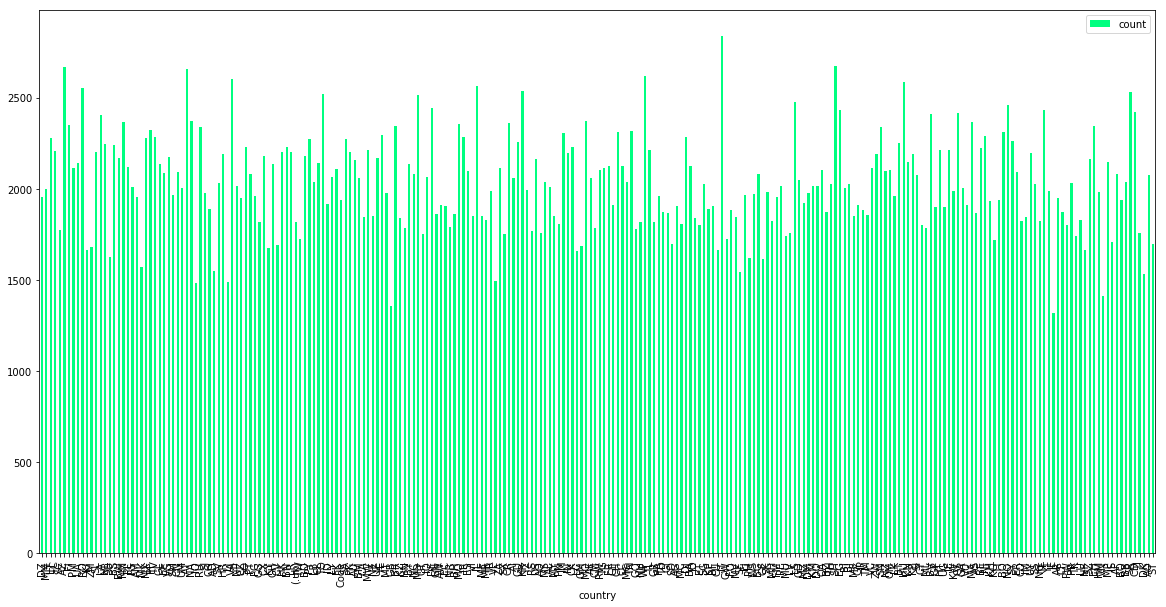

In [21]:
from matplotlib import pyplot as plt 
%matplotlib inline
df1.toPandas()\
    .plot(kind='bar',
          figsize=(20,10),
         x='country',
         y='count',
         colormap='winter_r')